In [1]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch the data.
df = pd.read_csv("https://ourworldindata.org/grapher/value-added-in-the-agricultural-sector-as-of-gdp-vs-gdp-per-capita.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})

# Fetch the metadata
metadata = requests.get("https://ourworldindata.org/grapher/value-added-in-the-agricultural-sector-as-of-gdp-vs-gdp-per-capita.metadata.json?v=1&csvType=full&useColumnShortNames=true").json()

In [2]:
df.Year.value_counts()

Year
 2023     304
 1990     278
 1983     274
 1982     274
 1973     274
         ... 
-10000    183
 1555      12
 1640      12
 1785      12
 1788      12
Name: count, Length: 265, dtype: int64

In [3]:
#truncate data to only years 1960
df= df[df['Year']>=1960]

df.columns

Index(['Entity', 'Code', 'Year', 'nv_agr_totl_zs', 'ny_gdp_pcap_pp_kd',
       'population_historical', 'owid_region'],
      dtype='object')

In [4]:
df.head(10)

,Entity,Code,Year,nv_agr_totl_zs,ny_gdp_pcap_pp_kd,population_historical,owid_region
0,Afghanistan,AFG,2002,38.627890,1774.3087,21378123.0,NaN
1,Afghanistan,AFG,2003,37.418854,1815.9282,22733054.0,NaN
2,Afghanistan,AFG,2004,29.721067,1776.9182,23560656.0,NaN
3,Afghanistan,AFG,2005,31.114855,1908.1147,24404574.0,NaN
4,Afghanistan,AFG,2006,28.635970,1929.7239,25424100.0,NaN
5,Afghanistan,AFG,2007,30.105011,2155.3530,25909852.0,NaN
6,Afghanistan,AFG,2008,24.892270,2191.5044,26482629.0,NaN
7,Afghanistan,AFG,2009,29.297500,2565.0220,27466101.0,NaN
8,Afghanistan,AFG,2010,26.210068,2848.5862,28284088.0,NaN
9,Afghanistan,AFG,2011,23.743664,2757.0525,29347709.0,NaN


In [5]:
#rename columns

df= df.rename(columns={'Entity':'Country', 'nv_agr_totl_zs': 'agr_pct', 'ny_gdp_pcap_pp_kd': 'gdp', 'population_historical': 'pop'})
df.head(5)

,Country,Code,Year,agr_pct,gdp,pop,owid_region
0,Afghanistan,AFG,2002,38.627890,1774.3087,21378123.0,NaN
1,Afghanistan,AFG,2003,37.418854,1815.9282,22733054.0,NaN
2,Afghanistan,AFG,2004,29.721067,1776.9182,23560656.0,NaN
3,Afghanistan,AFG,2005,31.114855,1908.1147,24404574.0,NaN
4,Afghanistan,AFG,2006,28.635970,1929.7239,25424100.0,NaN


In [6]:
df = df.sort_values(by=['Country', 'Year'])

df['gdp_change'] = df.groupby('Country')['gdp'].pct_change() * 100

C:\Users\felic\AppData\Local\Temp\ipykernel_5116\2728711092.py:3: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['gdp_change'] = df.groupby('Country')['gdp'].pct_change() * 100


In [7]:
region_dict = df[['Country', 'owid_region', 'Year']].copy()
region_dict = region_dict[region_dict['Year']==2023]

region_dict

,Country,owid_region,Year
21,Afghanistan,Asia,2023
525,Africa,NaN,2023
599,Africa (UN),NaN,2023
603,Aland Islands,Europe,2023
631,Albania,Europe,2023
...,...,...,...
59022,Yemen Arab Republic,Asia,2023
59046,Yemen People's Republic,Asia,2023
59124,Yugoslavia,Europe,2023
59188,Zambia,Africa,2023


In [8]:
region = dict(zip(region_dict.Country, region_dict.owid_region))
region

{'Afghanistan': 'Asia',
 'Africa': nan,
 'Africa (UN)': nan,
 'Aland Islands': 'Europe',
 'Albania': 'Europe',
 'Algeria': 'Africa',
 'American Samoa': 'Oceania',
 'Americas (UN)': nan,
 'Andorra': 'Europe',
 'Angola': 'Africa',
 'Anguilla': 'North America',
 'Antigua and Barbuda': 'North America',
 'Argentina': 'South America',
 'Armenia': 'Asia',
 'Aruba': 'North America',
 'Asia': nan,
 'Asia (UN)': nan,
 'Asia (excl. China and India)': nan,
 'Australia': 'Oceania',
 'Austria': 'Europe',
 'Austria-Hungary': 'Europe',
 'Azerbaijan': 'Asia',
 'Bahamas': 'North America',
 'Bahrain': 'Asia',
 'Bangladesh': 'Asia',
 'Barbados': 'North America',
 'Belarus': 'Europe',
 'Belgium': 'Europe',
 'Belize': 'North America',
 'Benin': 'Africa',
 'Bermuda': 'North America',
 'Bhutan': 'Asia',
 'Bolivia': 'South America',
 'Bonaire Sint Eustatius and Saba': 'North America',
 'Bosnia and Herzegovina': 'Europe',
 'Botswana': 'Africa',
 'Brazil': 'South America',
 'British Indian Ocean Territory': 'Asi

In [9]:
#put region back to the original dataset
df['Region']= df['Country'].map(region)
df

,Country,Code,Year,agr_pct,gdp,pop,owid_region,gdp_change,Region
221,Afghanistan,AFG,1960,NaN,NaN,9035048.0,NaN,NaN,Asia
222,Afghanistan,AFG,1961,NaN,NaN,9214082.0,NaN,NaN,Asia
223,Afghanistan,AFG,1962,NaN,NaN,9404411.0,NaN,NaN,Asia
224,Afghanistan,AFG,1963,NaN,NaN,9604491.0,NaN,NaN,Asia
225,Afghanistan,AFG,1964,NaN,NaN,9814318.0,NaN,NaN,Asia
...,...,...,...,...,...,...,...,...,...
59440,Zimbabwe,ZWE,2019,9.819262,3294.8062,15271377.0,NaN,-7.785577,Africa
59441,Zimbabwe,ZWE,2020,8.772859,2987.2698,15526888.0,NaN,-9.333975,Africa
59442,Zimbabwe,ZWE,2021,8.849899,3184.7854,15797220.0,NaN,6.611910,Africa
59443,Zimbabwe,ZWE,2022,7.170550,3323.1218,16069061.0,NaN,4.343665,Africa


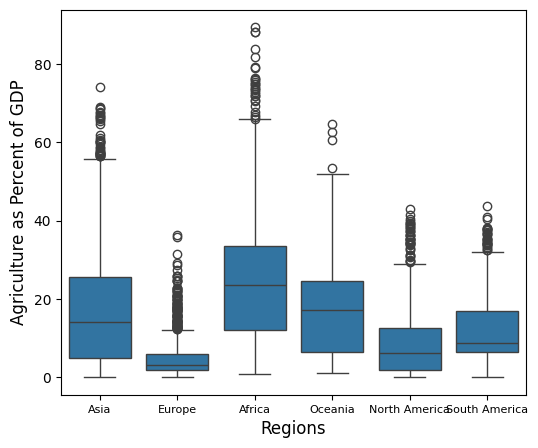

In [10]:
## Boxplot 
plt.figure(figsize=(6,5))

sns.boxplot(data = df,
               y = 'agr_pct',
               x = 'Region')

plt.yticks(fontsize=10)
plt.xticks(fontsize=8)

plt.ylabel("Agriculture as Percent of GDP", fontsize=12)
plt.xlabel("Regions", fontsize=12)

plt.show()

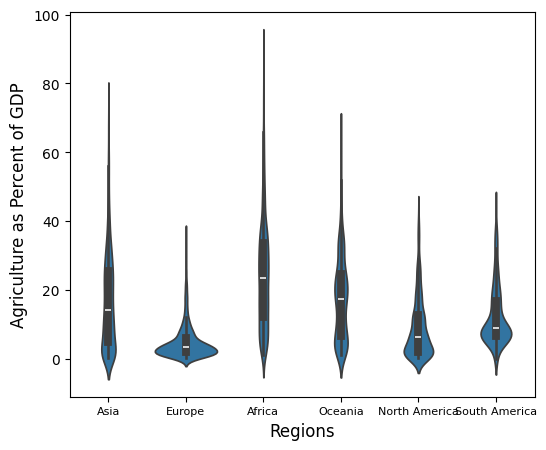

In [11]:
## violinplot 
plt.figure(figsize=(6,5))

sns.violinplot(data = df,
               y = 'agr_pct',
               x = 'Region')

plt.yticks(fontsize=10)
plt.xticks(fontsize=8)

plt.ylabel("Agriculture as Percent of GDP", fontsize=12)
plt.xlabel("Regions", fontsize=12)

plt.show()

Text(0.5, 0, 'Year')

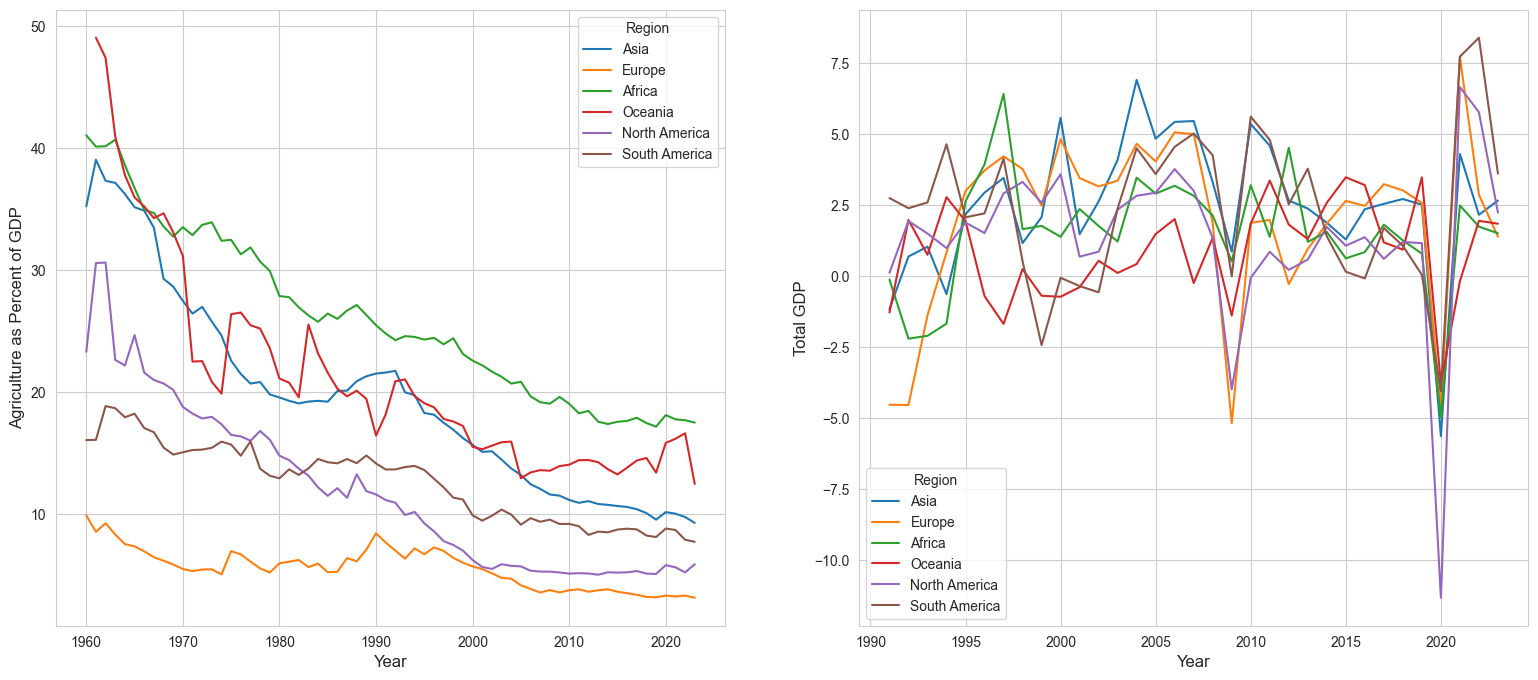

In [12]:
sns.set_style("whitegrid")
plt.figure(figsize=(19,8))
plt.subplot(1,2,1)
lineplot= sns.lineplot(data=df, x="Year", y="agr_pct", hue="Region", errorbar= None)

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.ylabel("Agriculture as Percent of GDP", fontsize=12)
plt.xlabel("Year", fontsize=12)

plt.subplot(1,2,2)
lineplot= sns.lineplot(data=df, x="Year", y="gdp_change", hue="Region", errorbar= None)

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.ylabel("Total GDP", fontsize=12)
plt.xlabel("Year", fontsize=12)



In [13]:
comm_df= pd.read_csv("long-term-prices-food/long-term-prices-food.csv")

comm_df= comm_df[comm_df['Year']>=1960]

comm_df.head(10)

,Entity,Code,Year,Tea,Sugar,Peanuts,Palm oil,Coffee,Cocoa,Wheat,Rye,Rice,Corn,Barley,Pork,Beef,Lamb
110,World,OWID_WRL,1960,88.604030,30.491224,88.649780,68.463100,122.79441,46.457430,77.220190,48.380486,46.496735,82.647210,56.718433,47.396427,270.78120,298.56946
111,World,OWID_WRL,1961,81.079660,27.104258,95.659390,68.984680,117.88081,37.366806,80.895200,54.846190,51.004875,80.470436,57.805614,51.046700,248.20020,241.74040
112,World,OWID_WRL,1962,81.954290,27.806490,95.452320,64.572140,108.36326,35.357180,79.721360,50.847282,57.205130,79.580925,62.540040,49.695396,256.99014,226.82794
113,World,OWID_WRL,1963,79.317665,81.629390,96.045170,65.630100,103.63574,42.142014,76.048340,57.306680,52.651676,87.258200,65.275890,40.895016,236.97522,271.92210
114,World,OWID_WRL,1964,76.142260,55.533466,94.776130,69.730705,128.16061,38.076730,63.923054,54.455060,49.675446,85.890990,67.545510,39.988520,295.09723,297.34073
115,World,OWID_WRL,1965,80.783200,19.111565,94.848520,78.028010,124.83429,27.041779,58.127857,50.297253,48.289050,87.566440,64.301900,53.305492,304.19632,224.04192
116,World,OWID_WRL,1966,68.651840,16.729107,91.409775,65.597450,112.68278,37.255157,61.741913,53.057163,57.389760,89.849480,66.543120,53.802616,342.97482,221.97410
117,World,OWID_WRL,1967,63.805954,17.177220,89.623340,60.453575,101.90392,41.836190,52.222404,52.050390,72.741320,82.052345,65.515305,45.946743,339.44630,230.59753
118,World,OWID_WRL,1968,54.834816,16.437183,89.790504,43.838833,98.12028,48.394768,44.180367,46.688232,67.433380,69.561560,60.277195,45.823997,339.58230,251.94672
119,World,OWID_WRL,1969,50.474630,26.259700,88.075870,44.630110,94.16107,57.192760,43.552380,44.750423,58.906710,71.399350,58.120820,57.341118,363.14440,251.13818


In [14]:
test=comm_df[['Year']].copy()
test['cost']= comm_df['Tea'].copy()
test.head()

,Year,cost
110,1960,88.604030
111,1961,81.079660
112,1962,81.954290
113,1963,79.317665
114,1964,76.142260


In [15]:
comm_l= ['Tea', 'Sugar', 'Peanuts', 'Palm oil', 'Coffee', 'Cocoa', 'Rye', 'Rice', 'Corn', 'Barley', 'Pork', 'Beef', 'Lamb']
comm= []
for i in comm_l:
    x = comm_df[['Year']].copy() 
    x['type']= i
    x['cost']=comm_df[i].copy()
    comm.append(x)

comm_all = pd.concat(comm)


comm_all.head(10)
    

,Year,type,cost
110,1960,Tea,88.604030
111,1961,Tea,81.079660
112,1962,Tea,81.954290
113,1963,Tea,79.317665
114,1964,Tea,76.142260
115,1965,Tea,80.783200
116,1966,Tea,68.651840
117,1967,Tea,63.805954
118,1968,Tea,54.834816
119,1969,Tea,50.474630


In [16]:
comm_all.groupby('type')['cost'].mean()

type
Barley       57.466331
Beef        234.275185
Cocoa        38.189005
Coffee       93.991371
Corn         54.547344
Lamb        290.444922
Palm oil     43.891880
Peanuts      54.600457
Pork         35.905238
Rice         37.431115
Rye          41.104999
Sugar        31.330864
Tea          42.652244
Name: cost, dtype: float64

In [17]:
meat = ['Beef', 'Pork', 'Lamb']
crop = ['Tea', 'Sugar', 'Peanuts', 'Palm oil', 'Coffee', 'Cocoa', 'Rye', 'Rice', 'Corn', 'Barley']
comm_meat= comm_all[comm_all['type'].isin(meat)].copy()
comm_crop= comm_all[comm_all['type'].isin(crop)].copy()

(1990.0, 2020.0)

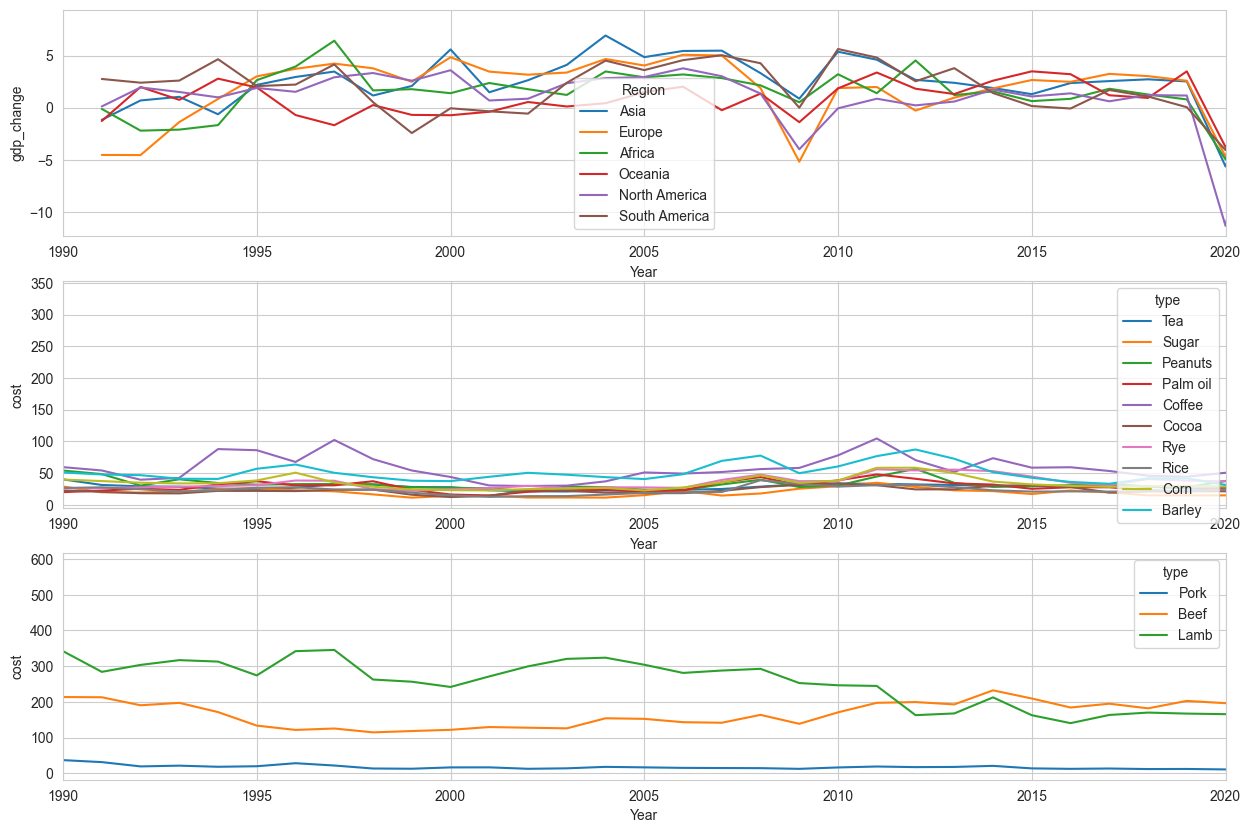

In [18]:
plt.figure(figsize=(15 ,10))
plt.subplot(3,1,1)
sns.lineplot(data=df, x='Year', y='gdp_change', hue='Region', errorbar=None)
plt.xlim((1990, 2020))

plt.subplot(3,1,2)
sns.lineplot(data=comm_crop, x='Year', y='cost', hue='type')
plt.xlim((1990, 2020))

plt.subplot(3,1,3)
sns.lineplot(data=comm_meat, x='Year', y='cost', hue='type')
plt.xlim((1990, 2020))


In [19]:
petrol= pd.read_csv("commodity-price-index-cereal-crops-and-petroleum/commodity-price-index-cereal-crops-and-petroleum.csv")
#petroleum index, with 1900 as reference, at 1900, these index set at 100
petrol = petrol[['Year', 'Petroleum']]
petrol = petrol[petrol['Year']>=1960]
petrol.head()


,Year,Petroleum
100,1960,147.22638
101,1961,145.75018
102,1962,144.11253
103,1963,142.41820
104,1964,139.35345


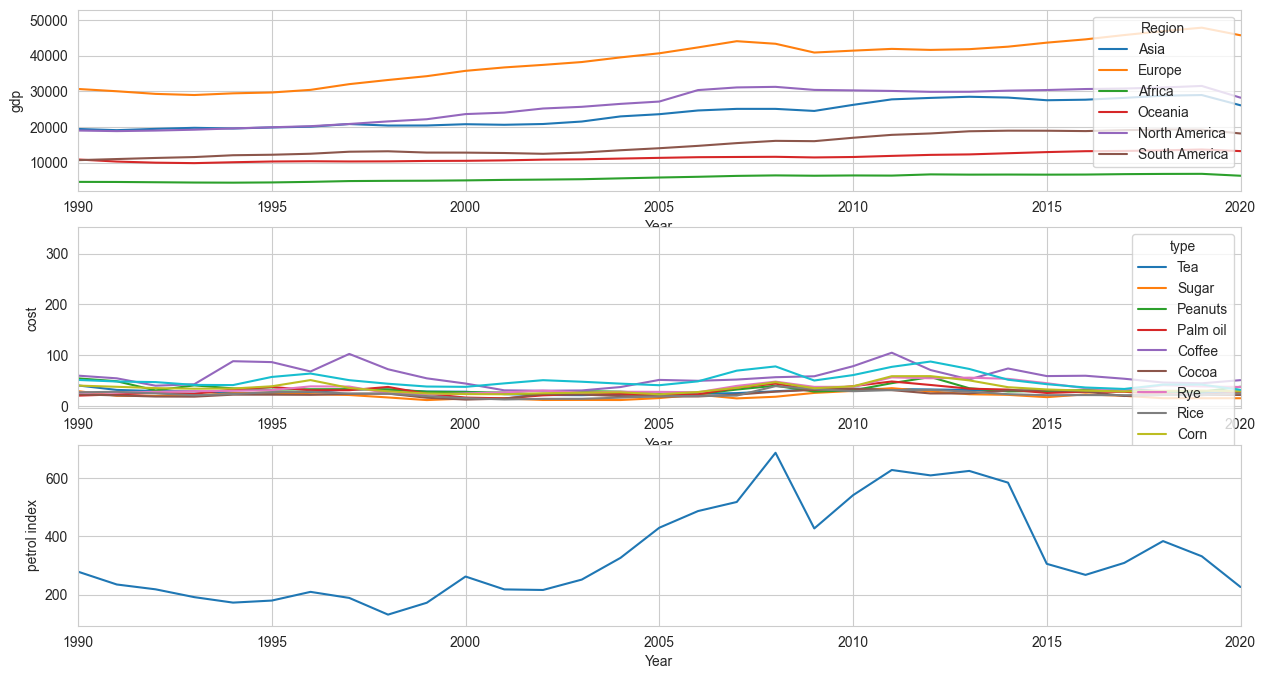

In [20]:
plt.figure(figsize=(15 ,8))
plt.subplot(3,1,1)
sns.lineplot(data=df, x='Year', y='gdp', hue='Region', errorbar=None)
plt.xlim((1990, 2020))

plt.subplot(3,1,2)
sns.lineplot(data=comm_crop, x='Year', y='cost', hue='type')
plt.xlim((1990, 2020))

plt.subplot(3,1,3)
pet_fig= sns.lineplot(data=petrol, x='Year', y='Petroleum')
plt.xlim((1990, 2020))
pet_fig.set(xlabel='Year', ylabel='petrol index')


plt.show()


In [21]:
ag_out= pd.read_csv("agricultural-output-dollars/agricultural-output-dollars.csv")
ag_out= ag_out[ag_out['Year']>=1960]

ag_out['Region']= ag_out['Entity'].map(region)
ag_out.head()


,Entity,Code,Year,output_quantity,Region
0,Afghanistan,AFG,1961,2566730000,Asia
1,Afghanistan,AFG,1962,2611942000,Asia
2,Afghanistan,AFG,1963,2632254000,Asia
3,Afghanistan,AFG,1964,2810010000,Asia
4,Afghanistan,AFG,1965,2932230000,Asia


<Axes: xlabel='Region', ylabel='output_quantity'>

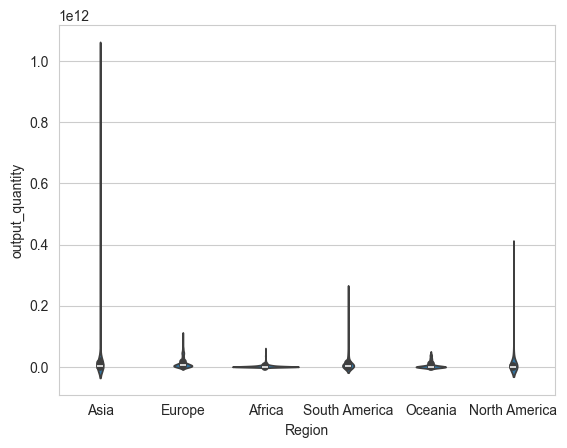

In [22]:
sns.violinplot(data=ag_out, x='Region', y='output_quantity')

(1990.0, 2020.0)

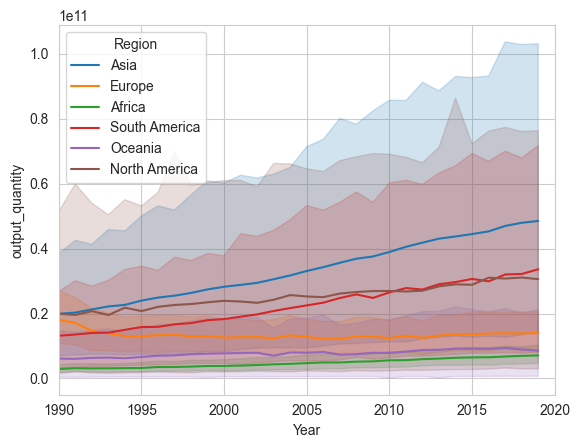

In [23]:
sns.lineplot(data=ag_out, x='Year', y='output_quantity', hue='Region')
plt.xlim((1990, 2020))


In [24]:
africa_ag= ag_out[ag_out['Region']=='Africa'].copy()
africa_ag

sum= africa_ag.groupby('Entity')['output_quantity'].describe()
sum.sort_values('mean')

,count,mean,std,min,25%,50%,75%,max
Entity,,,,,,,,
Sao Tome and Principe,59.0,2.870386e+07,6.711480e+06,1.729300e+07,2.261250e+07,2.866100e+07,3.506550e+07,4.247200e+07
Cape Verde,59.0,3.876868e+07,1.858697e+07,1.373100e+07,2.083850e+07,4.064700e+07,5.911550e+07,6.868400e+07
Djibouti,59.0,5.116041e+07,2.237673e+07,1.515100e+07,2.640750e+07,5.588300e+07,7.119600e+07,8.700600e+07
Equatorial Guinea,59.0,6.515324e+07,1.612746e+07,3.747500e+07,5.134550e+07,6.340500e+07,7.858700e+07,9.261600e+07
Comoros,59.0,6.783369e+07,2.032587e+07,3.798500e+07,4.954700e+07,6.576600e+07,8.618800e+07,9.656700e+07
Gambia,59.0,1.704043e+08,3.975505e+07,1.024810e+08,1.450730e+08,1.577640e+08,1.975325e+08,2.920720e+08
Lesotho,59.0,2.048103e+08,4.758378e+07,1.295980e+08,1.643615e+08,1.932790e+08,2.488450e+08,2.917810e+08
Guinea-Bissau,59.0,2.459452e+08,1.163776e+08,1.130620e+08,1.485300e+08,2.112480e+08,3.169740e+08,4.859800e+08
Gabon,59.0,2.967522e+08,1.103341e+08,1.415800e+08,1.863280e+08,2.894340e+08,3.650000e+08,5.135830e+08


In [25]:
africa_top= ['Nigeria', 'Egypt', 'South Africa','Sudan', 'Ethiopia', 'Morocco', 'Tanzania', 'Alheria', 'Kenya', 'Uganda']
africa_ag_top = africa_ag[africa_ag['Entity'].isin(africa_top)].copy()

africa_ag_top


,Entity,Code,Year,output_quantity,Region
3289,Egypt,EGY,1961,5762750000,Africa
3290,Egypt,EGY,1962,6856018000,Africa
3291,Egypt,EGY,1963,7083168000,Africa
3292,Egypt,EGY,1964,7109021000,Africa
3293,Egypt,EGY,1965,7234207000,Africa
...,...,...,...,...,...
11115,Uganda,UGA,2015,8775461000,Africa
11116,Uganda,UGA,2016,8056567000,Africa
11117,Uganda,UGA,2017,8536130000,Africa
11118,Uganda,UGA,2018,8632568000,Africa


[Text(0.5, 0, 'Year'), Text(0, 0.5, 'petrol index')]

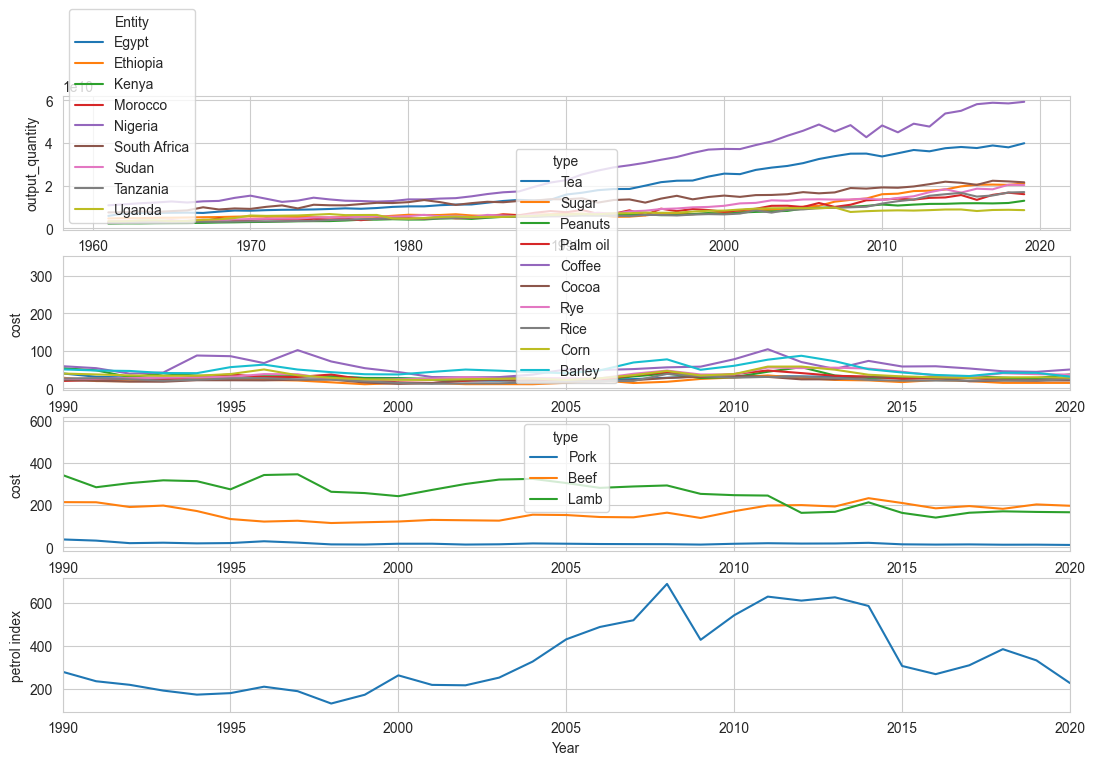

In [26]:
plt.figure(figsize=(13,8))
plt.subplot(4,1,1)
sns.lineplot(data=africa_ag_top, x='Year', y= 'output_quantity', hue='Entity')

plt.subplot(4,1,2)
sns.lineplot(data=comm_crop, x='Year', y='cost', hue='type')
plt.xlim((1990, 2020))

plt.subplot(4,1,3)
sns.lineplot(data=comm_meat, x='Year', y='cost', hue='type')
plt.xlim((1990, 2020))

plt.subplot(4,1,4)
pet_fig= sns.lineplot(data=petrol, x='Year', y='Petroleum')
plt.xlim((1990, 2020))
pet_fig.set(xlabel='Year', ylabel='petrol index')


In [27]:
## unemployment
employ = pd.read_csv("unemployment-rate/unemployment-rate.csv")
employ.head()

,Entity,Code,Year,"Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,Afghanistan,AFG,1991,7.946
1,Afghanistan,AFG,1992,7.940
2,Afghanistan,AFG,1993,7.961
3,Afghanistan,AFG,1994,7.980
4,Afghanistan,AFG,1995,7.967


In [28]:
employ['Region']= employ['Entity'].map(region)
employ['unemployed']=employ["Unemployment, total (% of total labor force) (modeled ILO estimate)"].copy()

In [29]:
employ['unemp_change'] = employ.groupby('Entity')['unemployed'].pct_change()*100

In [46]:
## economic inequality (GINI index)
gini= pd.read_csv("gini-coefficient.csv")
gini = gini[gini['Year']>=1960]
gini['Region'] = gini['Country'].map(region)
gini['gini']= gini['Gini coefficient (before tax) (World Inequality Database)']
gini['gini_change'] = gini.groupby('Country')['gini'].pct_change()*100

gini.head()

C:\Users\felic\AppData\Local\Temp\ipykernel_5116\2993132241.py:6: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  gini['gini_change'] = gini.groupby('Country')['gini'].pct_change()*100


,Country,Year,Gini coefficient (before tax) (World Inequality Database),Region,gini,gini_change
0,Afghanistan,1980,NaN,Asia,NaN,NaN
1,Afghanistan,1981,NaN,Asia,NaN,NaN
2,Afghanistan,1982,NaN,Asia,NaN,NaN
3,Afghanistan,1983,NaN,Asia,NaN,NaN
4,Afghanistan,1984,NaN,Asia,NaN,NaN


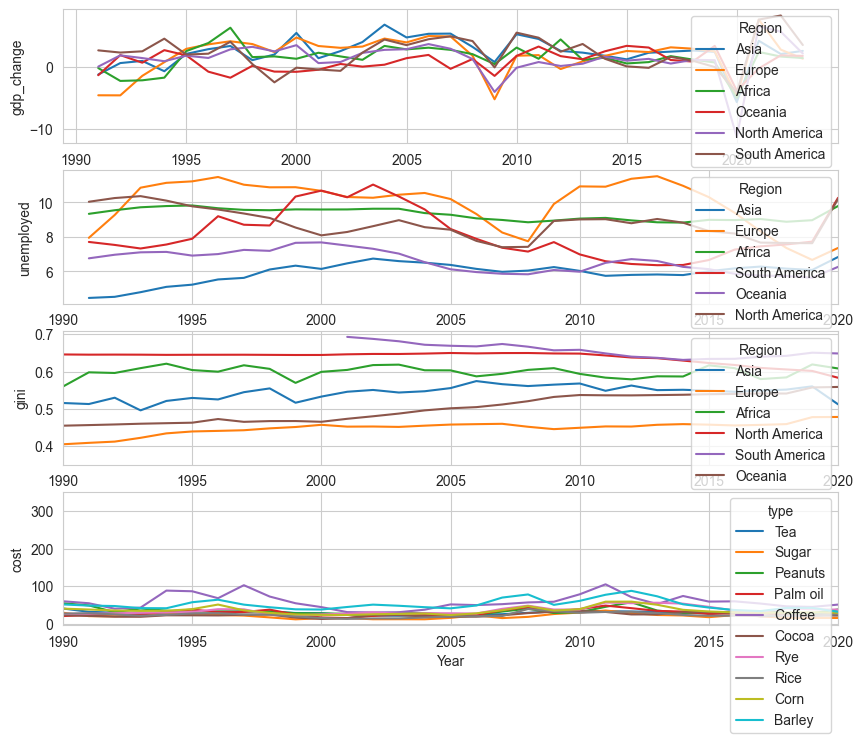

In [47]:
plt.figure(figsize=(10,8))
plt.subplot(4,1,1)
gdp=sns.lineplot(data=df, x='Year', y= 'gdp_change', hue='Region', errorbar=None)
sns.move_legend(gdp, 'upper right')

plt.subplot(4,1,2)
emp= sns.lineplot(data=employ, x='Year', y='unemployed', hue='Region', errorbar=None)
plt.xlim((1990, 2020))
sns.move_legend(emp, 'upper right')

plt.subplot(4,1,3)
ineq= sns.lineplot(data=gini, x='Year', y='gini', hue='Region', errorbar=None)
plt.xlim((1990, 2020))
sns.move_legend(ineq, 'upper right')

plt.subplot(4,1,4)
co=sns.lineplot(data=comm_crop, x='Year', y='cost', hue='type')
plt.xlim((1990, 2020))
sns.move_legend(co, 'upper right')



In [48]:
##key crop yields

crop_y= pd.read_csv("key-crop-yields/key-crop-yields.csv")
crop_y.columns

def colstrip(t):
    out= t.split(" ")
    return out[0]

crop_col_d= {}
for i in crop_y.columns:
    crop_col_d[i] = colstrip(i)

crop_y = crop_y.rename(columns= crop_col_d)

crop_y = crop_y[crop_y['Year']>=1990]

crop_y['Region']= crop_y.Entity.map(region)
crop_y.head()

,Entity,Code,Year,Wheat,Rice,Bananas,Maize,Soybeans,Potatoes,"Beans,","Peas,",Cassava,Cocoa,Barley,Region
29,Afghanistan,AFG,1990,1.0510,1.9029,NaN,1.7582,NaN,16.8421,NaN,NaN,NaN,NaN,1.0537,Asia
30,Afghanistan,AFG,1991,1.0213,1.9364,NaN,1.6800,NaN,16.6418,NaN,NaN,NaN,NaN,1.0637,Asia
31,Afghanistan,AFG,1992,1.0313,1.7143,NaN,1.5000,NaN,16.6667,NaN,NaN,NaN,NaN,0.8000,Asia
32,Afghanistan,AFG,1993,1.0211,1.7143,NaN,1.6786,NaN,16.6912,NaN,NaN,NaN,NaN,1.0000,Asia
33,Afghanistan,AFG,1994,1.0250,1.9000,NaN,1.6667,NaN,16.5942,NaN,NaN,NaN,NaN,0.9200,Asia


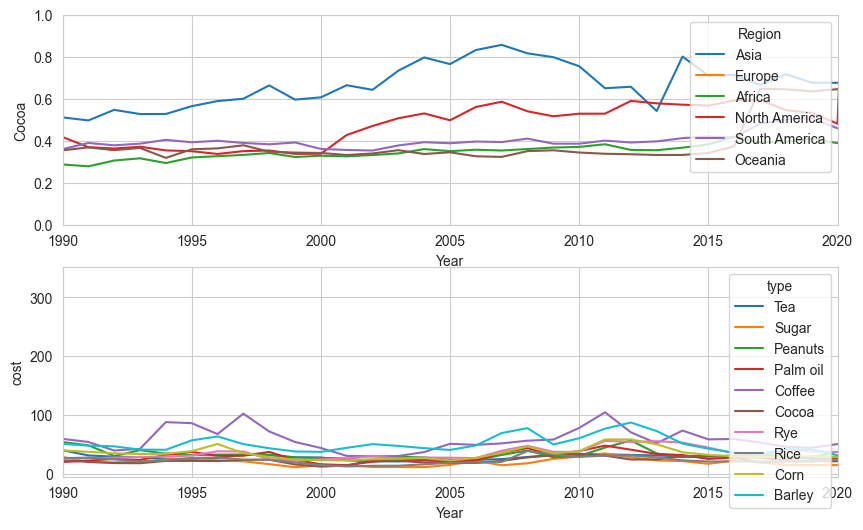

In [49]:
plt.figure(figsize= (10,6))
plt.subplot(2,1,1)
ax= sns.lineplot(data=crop_y, x= 'Year', y='Cocoa', hue='Region', errorbar=None)
sns.move_legend(ax, 'upper right')

plt.xlim(1990, 2020)
plt.ylim(0, 1.0)

plt.subplot(2,1,2)
az= sns.lineplot(data=comm_crop, x='Year', y='cost', hue='type')
plt.xlim((1990, 2020))
sns.move_legend(az, 'upper right')


In [65]:
## merge datasets
df.columns
ag=df[['Country', 'Code', 'Year', 'agr_pct', 'gdp', 'gdp_change', 'pop']].copy()

ag_df = pd.merge(ag, employ, on=['Code', 'Year'])
ag_df


,Country,Code,Year,agr_pct,gdp,gdp_change,pop,Entity,"Unemployment, total (% of total labor force) (modeled ILO estimate)",Region,unemployed,unemp_change
0,Afghanistan,AFG,1991,NaN,NaN,NaN,12238879.0,Afghanistan,7.946,Asia,7.946,NaN
1,Afghanistan,AFG,1992,NaN,NaN,NaN,13278982.0,Afghanistan,7.940,Asia,7.940,-0.075510
2,Afghanistan,AFG,1993,NaN,NaN,NaN,14943174.0,Afghanistan,7.961,Asia,7.961,0.264484
3,Afghanistan,AFG,1994,NaN,NaN,NaN,16250799.0,Afghanistan,7.980,Asia,7.980,0.238663
4,Afghanistan,AFG,1995,NaN,NaN,NaN,17065836.0,Afghanistan,7.967,Asia,7.967,-0.162907
...,...,...,...,...,...,...,...,...,...,...,...,...
19132,Zimbabwe,ZWE,2019,9.819262,3294.8062,-7.785577,15271377.0,Zimbabwe,7.373,Africa,7.373,8.554181
19133,Zimbabwe,ZWE,2020,8.772859,2987.2698,-9.333975,15526888.0,Zimbabwe,8.621,Africa,8.621,16.926624
19134,Zimbabwe,ZWE,2021,8.849899,3184.7854,6.611910,15797220.0,Zimbabwe,9.540,Africa,9.540,10.660016
19135,Zimbabwe,ZWE,2022,7.170550,3323.1218,4.343665,16069061.0,Zimbabwe,10.087,Africa,10.087,5.733753


In [69]:
fulldf= pd.merge(ag_df, gini, on=['Country', 'Year'])
fulldf.head()


,Country,Code,Year,agr_pct,gdp,gdp_change,pop,Entity,"Unemployment, total (% of total labor force) (modeled ILO estimate)",Region_x,unemployed,unemp_change,Gini coefficient (before tax) (World Inequality Database),Region_y,gini,gini_change
0,Afghanistan,AFG,1991,NaN,NaN,NaN,12238879.0,Afghanistan,7.946,Asia,7.946,NaN,NaN,Asia,NaN,NaN
1,Afghanistan,AFG,1992,NaN,NaN,NaN,13278982.0,Afghanistan,7.940,Asia,7.940,-0.075510,NaN,Asia,NaN,NaN
2,Afghanistan,AFG,1993,NaN,NaN,NaN,14943174.0,Afghanistan,7.961,Asia,7.961,0.264484,NaN,Asia,NaN,NaN
3,Afghanistan,AFG,1994,NaN,NaN,NaN,16250799.0,Afghanistan,7.980,Asia,7.980,0.238663,NaN,Asia,NaN,NaN
4,Afghanistan,AFG,1995,NaN,NaN,NaN,17065836.0,Afghanistan,7.967,Asia,7.967,-0.162907,NaN,Asia,NaN,NaN


<Figure size 1200x500 with 0 Axes>

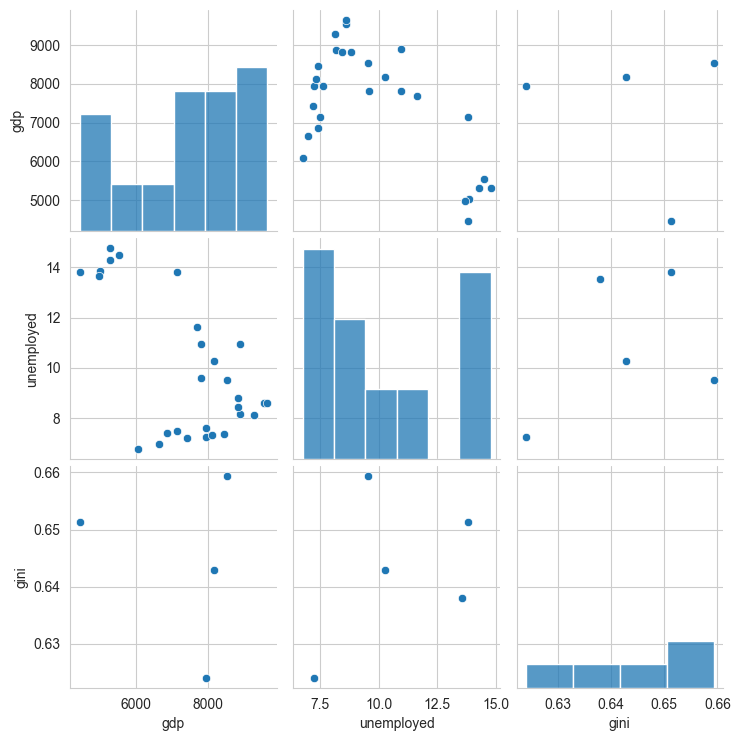

In [70]:
plt.figure(figsize=(12,5))
sns.pairplot(data= fulldf[fulldf['Country']=='Syria'], x_vars= ['gdp', 'unemployed', 'gini'], y_vars = ['gdp', 'unemployed', 'gini'])

<Figure size 1200x500 with 0 Axes>

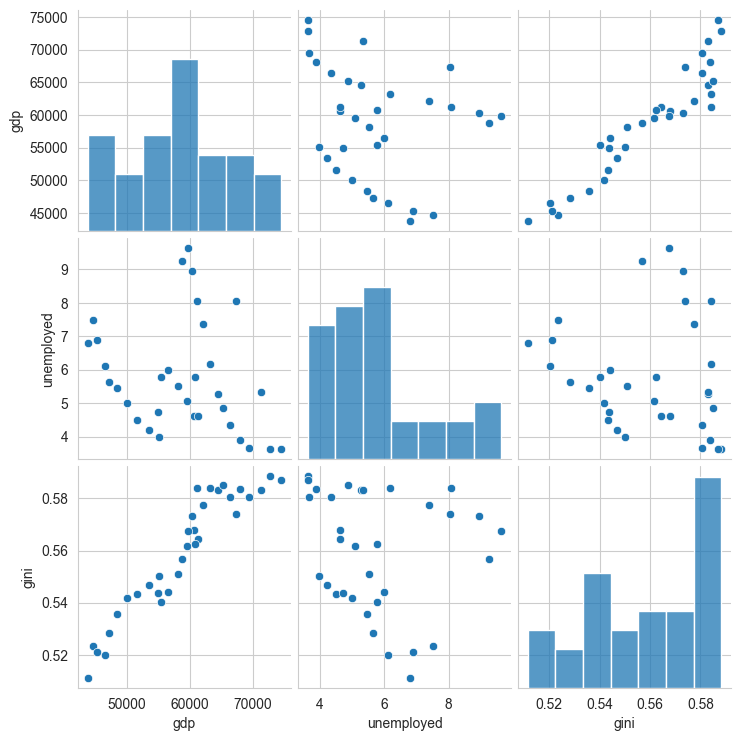

In [72]:
plt.figure(figsize=(12,5))
sns.pairplot(data= fulldf[fulldf['Country']=='United States'], x_vars= ['gdp', 'unemployed', 'gini'], y_vars = ['gdp', 'unemployed', 'gini'])

<Figure size 1200x500 with 0 Axes>

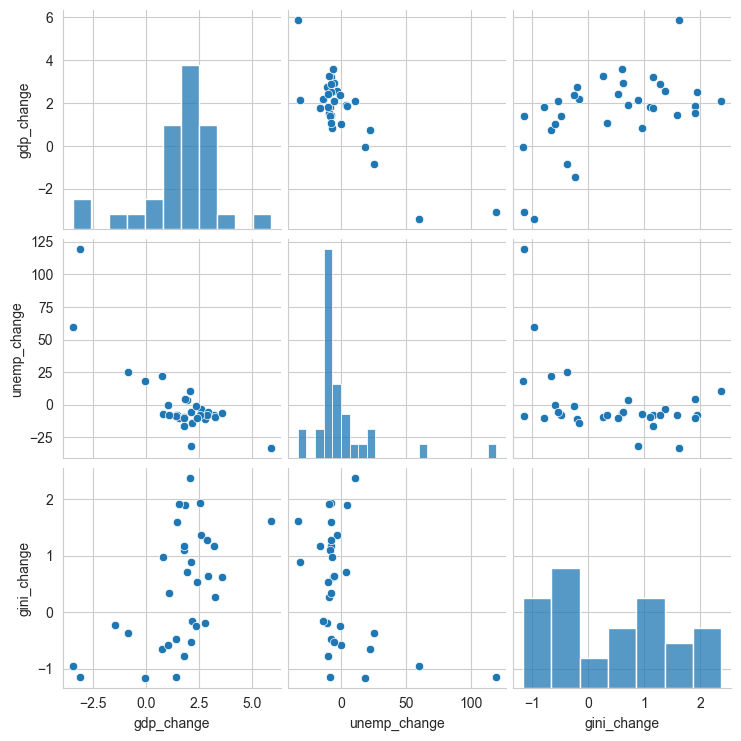

In [73]:
plt.figure(figsize=(12,5))
sns.pairplot(data= fulldf[fulldf['Country']=='United States'], x_vars= ['gdp_change', 'unemp_change', 'gini_change'], y_vars = ['gdp_change', 'unemp_change', 'gini_change'])

<Axes: xlabel='Year', ylabel='gdp_change'>

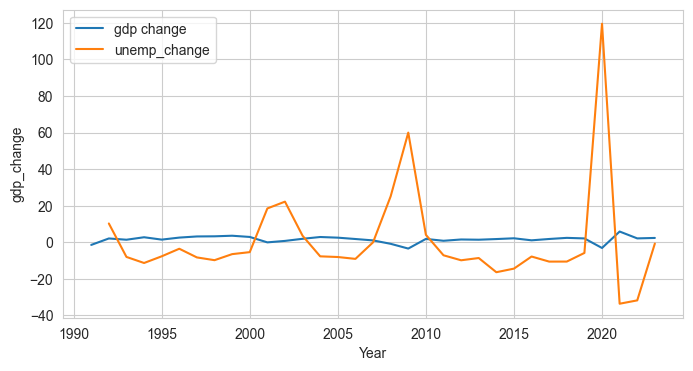

In [74]:
plt.figure(figsize=(8,4))
sns.lineplot(data=fulldf[fulldf['Country']=='United States'], x='Year', y='gdp_change', legend='auto', label='gdp change')
sns.lineplot(data=fulldf[fulldf['Country']=='United States'], x='Year', y='unemp_change', legend='auto', label='unemp_change')


In [75]:
## select countries based on their ag output

all_reg = ag_out.Entity.unique()
avg_d={}
for c in all_reg:
    avg_d[c] = ag_out[ag_out['Entity']==c]['output_quantity'].mean()

avg_ag=pd.DataFrame({'Country':[i for i in avg_d.keys()], 'avg_ag': [y for y in avg_d.values()]})
avg_ag.head()

,Country,avg_ag
0,Afghanistan,4.092598e+09
1,Albania,1.177106e+09
2,Algeria,6.087515e+09
3,Angola,2.399971e+09
4,Argentina,4.198609e+10


In [76]:
avg_ag['Region'] = avg_ag['Country'].map(region)
rand_s = avg_ag.groupby('Region', group_keys=False).apply(lambda x: x.sample(frac=0.08, random_state=316))
rand_s

C:\Users\felic\AppData\Local\Temp\ipykernel_5116\3480589007.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rand_s = avg_ag.groupby('Region', group_keys=False).apply(lambda x: x.sample(frac=0.08, random_state=316))


,Country,avg_ag,Region
29,Cape Verde,3.876868e+07,Africa
134,Niger,2.338093e+09,Africa
160,Rwanda,1.855999e+09,Africa
16,Benin,1.610395e+09,Africa
95,Japan,2.903417e+10,Asia
89,Iran,2.234530e+10,Asia
88,Indonesia,5.028875e+10,Asia
9,Azerbaijan,3.103626e+09,Asia
142,Norway,3.826360e+09,Europe
67,Finland,3.180973e+09,Europe


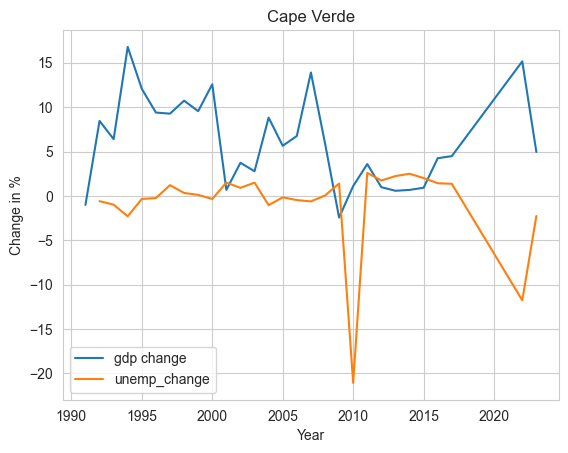

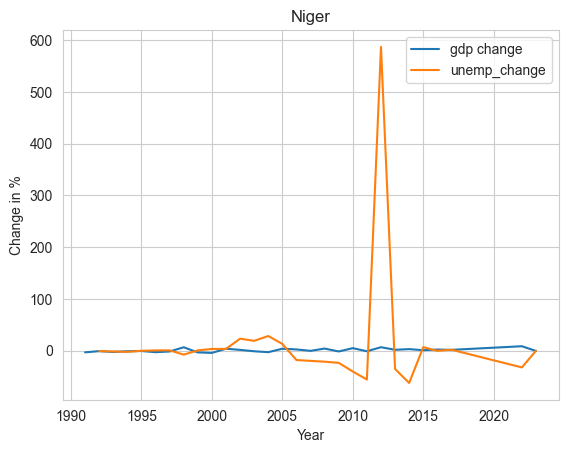

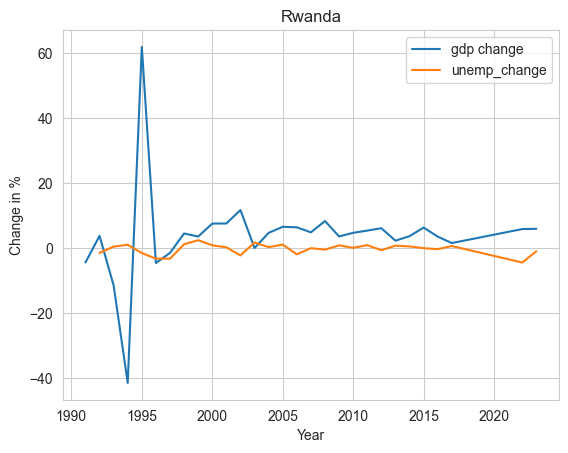

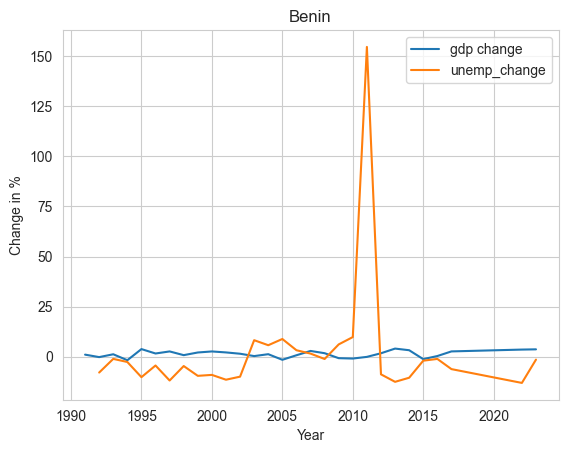

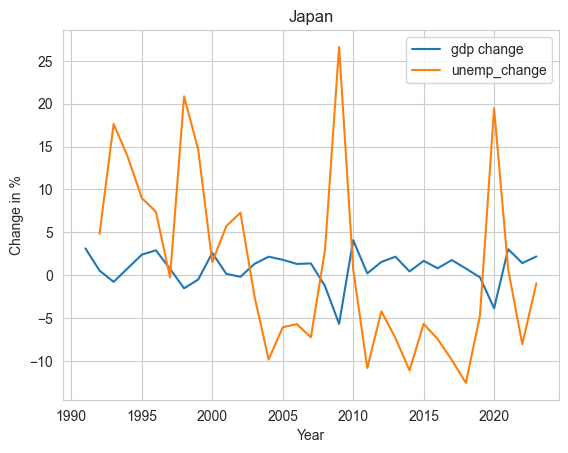

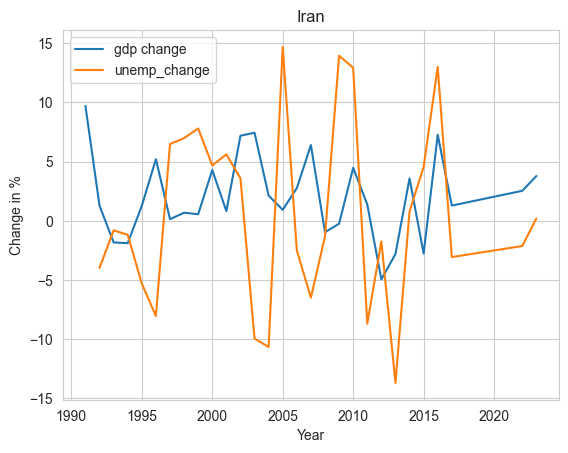

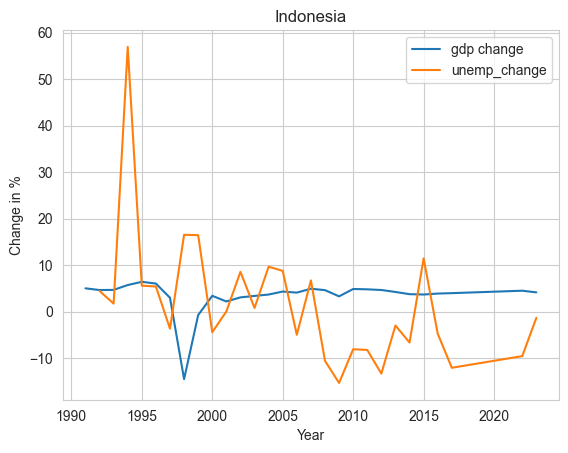

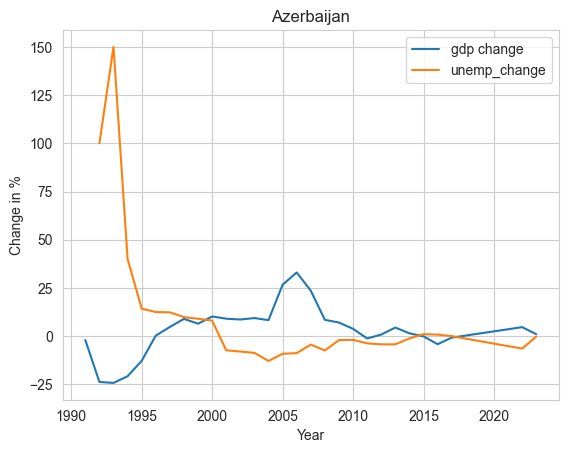

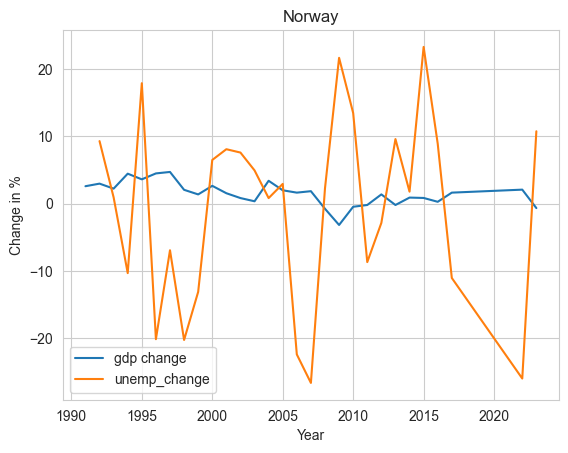

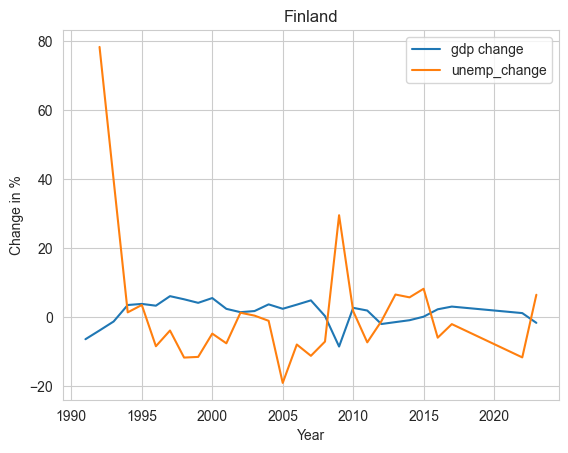

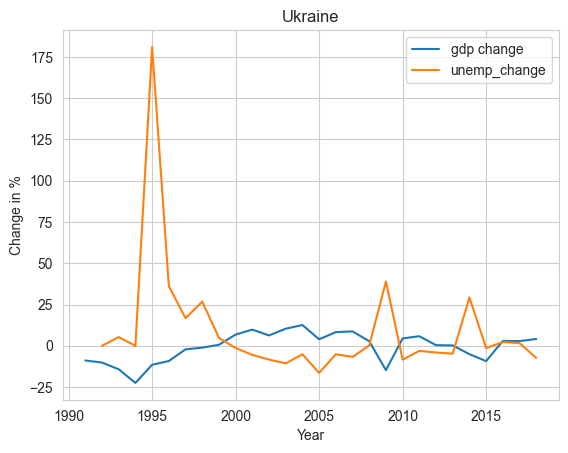

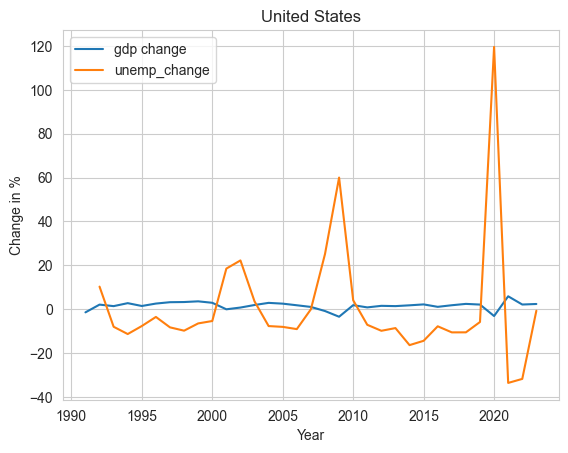

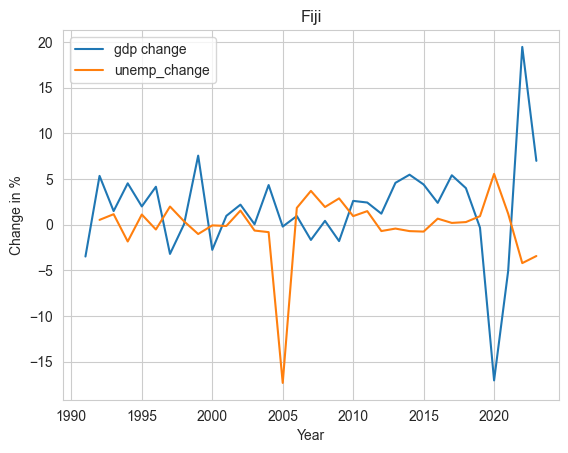

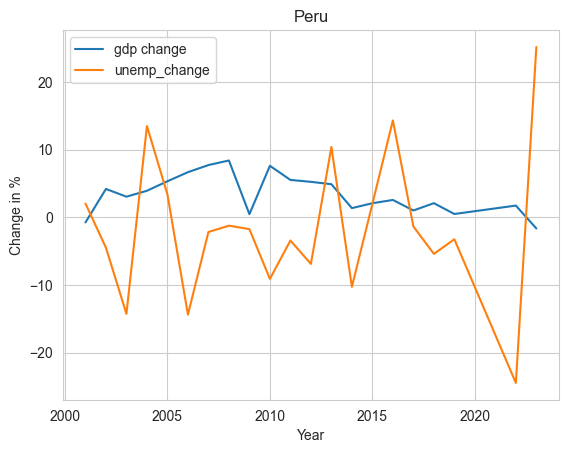

In [77]:
select_country= [i for i in rand_s['Country']]

for country in select_country:

    fig= sns.lineplot(data=fulldf[fulldf['Country']==country], x='Year', y='gdp_change', legend='auto', label='gdp change')
    fig= sns.lineplot(data=fulldf[fulldf['Country']==country], x='Year', y='unemp_change', legend='auto', label='unemp_change')
    fig.set_title(country)
    fig.set(xlabel='Year', ylabel='Change in %')

    plt.show()


In [79]:
# output the clean csv
fulldf.columns

features = ['Country', 'Code', 'Year', 'agr_pct', 'gdp', 'gdp_change', 'pop',
       'unemployed', 'unemp_change', 'Region_y', 'gini', 'gini_change']

df_out= fulldf[features].copy()
df_out.columns

Index(['Country', 'Code', 'Year', 'agr_pct', 'gdp', 'gdp_change', 'pop',
       'unemployed', 'unemp_change', 'Region_y', 'gini', 'gini_change'],
      dtype='object')

In [80]:
df_out = df_out.rename(columns={'Region_y':'Region'})
df_out.columns

Index(['Country', 'Code', 'Year', 'agr_pct', 'gdp', 'gdp_change', 'pop',
       'unemployed', 'unemp_change', 'Region', 'gini', 'gini_change'],
      dtype='object')

In [83]:
df_out.to_csv("gdp_gini_unemp_1960.csv", index=False)